Problem Statement 1

In [34]:
import random
massDist = (0.2,0.4,0.1,0.1,0.1,0.1)
def roll(massDist):
    randRoll = random.random() # in [0,1]
    sum = 0
    result = 1
    for mass in massDist:
        sum += mass
        if randRoll < sum:
            return result
        result+=1

def dice(massDict):
    step = 0;
    numstep = 0;
    for i in range(100000):
        for i in range(250):
            result = roll(massDict)
            # print("You rolled",result)
        if result==1 or result==2: step=max(0,step-1)
        elif result>=3 and result<=5: step=step+1
        else: 
            result1 = roll(massDict)
            step=step+result1
        if step>60: numstep=numstep+1
    return numstep

numstep = dice(massDist)
print("Probability = ",numstep/100000)

Probability =  0.21691


Problem Statement 2

Random Data for Linear Regression

In [35]:
import numpy as np
import pandas as pd
import scipy
import random
from scipy.stats import norm
random.seed(1)
n_features = 4
X = []
for i in range(n_features):
    X_i = scipy.stats.norm.rvs(0, 1, 100)
    X.append(X_i)
#print(X)
eps = scipy.stats.norm.rvs(0, 0.25,100)
y = 1 + (0.4 * X[0]) + eps + (0.5 * X[1]) + (0.3 * X[2]) + (0.4 * X[3])
data_mlr = {'X0': X[0],'X1':X[1],'X2':X[2],'X3':X[3],'Y': y }
df = pd.DataFrame(data_mlr)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
#df.to_csv('file1.csv') - from this statement we can generate it to csv format

         X0        X1        X2        X3         Y
0 -0.381628  1.197031  0.929858 -1.554308  0.940842
1  0.136436 -1.233528  0.410580  1.138531  0.965800
2  0.018444  0.100027 -0.586007 -0.134705  1.095683
3  0.402928  0.921435  0.290072 -1.476784  0.912180
4 -0.155967 -0.020985  1.660527 -1.316407  0.822326
          X0        X1        X2        X3         Y
95  0.017886  0.755963  0.926295  1.140623  2.286016
96  1.758766  0.412127  0.003410  0.259682  1.921530
97 -0.695840 -0.472389 -0.103946 -0.152054  0.234136
98  0.362451 -0.226238 -1.234896  0.523522  0.886967
99  1.020785  2.351176  1.339573  0.139454  3.456115
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
X0    100 non-null float64
X1    100 non-null float64
X2    100 non-null float64
X3    100 non-null float64
Y     100 non-null float64
dtypes: float64(5)
memory usage: 4.0 KB
None
               X0          X1          X2          X3           Y
count  100.000000  10

Random Data for Logistic Regression

In [5]:
n_features = 4
X = []
for i in range(n_features):
  X_i = scipy.stats.norm.rvs(0, 1, 100)
  X.append(X_i)
#print(X)
a1 = (np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))/(1 + np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))))
#print(a1)
y1 = []
for i in a1:
  if (i>=0.5):
    y1.append(1)
  else:
    y1.append(0)
#print(y1)
data_lr = {'X0': X[0],'X1':X[1],'X2':X[2],'X3':X[3],'Y': y1 }
df1 = pd.DataFrame(data_lr)
print(df1.head())
print(df1.tail())
print(df1.info())
print(df1.describe())

         X0        X1        X2        X3  Y
0  0.504857 -0.055427  0.227699 -0.947237  1
1 -1.586259  1.453189 -0.726366 -0.476809  1
2  0.470961  0.591235 -0.314390  1.407829  1
3  0.306974  0.166083  1.070944  0.532603  1
4 -0.562862 -1.179548  1.953966  0.104510  1
          X0        X1        X2        X3  Y
95 -0.150128  1.564942  0.521429  0.698388  1
96  0.575497 -1.176935  0.607625  1.193475  1
97 -0.569024  0.641095  1.493383  0.354178  1
98 -0.810205 -0.180606 -1.403905 -0.109654  1
99 -1.012058 -0.362206 -0.375748  1.922488  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
X0    100 non-null float64
X1    100 non-null float64
X2    100 non-null float64
X3    100 non-null float64
Y     100 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB
None
               X0          X1          X2          X3           Y
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.192157    0.058505  

Random Data for K means Clustering

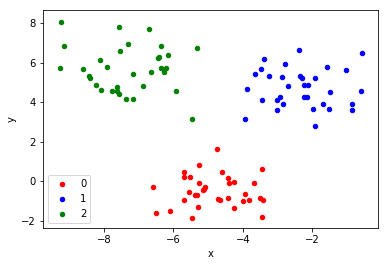

In [28]:
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X3, y3 = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X3[:,0], y=X3[:,1], label=y3))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Problem Statement 3

Linear Regression using gradient descent

In [8]:
X = df.iloc[:,0].values
# print(X)
y = df.iloc[:,4].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2
  d1 = (-2/n) * sum(X * (y - y_p))
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)

0.12033042925103404 0.21254722703720827


Logistic regression using Gradient descent

In [9]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values

def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat)))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz)
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)

0.6931471805599453
0.3858429083509646
0.38530949767165595
0.384786352217898
0.3842733507884137
0.3837703720146266
0.38327729428922175
0.38279399570346495
0.38232035399346626
0.38185624649550337


Linear Regreesion using L1 Regularization

In [10]:
X = df.iloc[:,0].values
#print(X)
y = df.iloc[:,4].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
lam = 0.1
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2 + (lam * b1)
  d1 = (-2/n) * sum(X * (y - y_p)) + lam
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)

0.11122970402666771 0.21270111626376426


Linear Regreesion using L2 Regularization

In [11]:
#print(X)
y = df.iloc[:,4].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
lam = 0.1
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2 + ((lam/2) * b1)
  d1 = (-2/n) * sum(X * (y - y_p)) + (lam *b1)
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)

0.11974924597113544 0.21255386283551186


Logistic regression using L1 regualrization

In [12]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(W)))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)

0.6931471805599453
-0.012126098265757224
-0.4064238509057354
-0.7965907889663033
-1.1826694640689903
-1.5647031911633091
-1.9427359777929496
-2.3168124549435705
-2.6869778095293464
-3.0532777185729048


Logistic regression using L2 regualrization

In [13]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(np.square(W))))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam * W
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)

0.6931471805599453
0.3863840673405913
0.38743223327809967
0.38947015016341324
0.3924392173930635
0.39628322637877567
0.400948284924234
0.40638274378174866
0.4125371252591498
0.41936405375954267


K Means Clustering Algorithm

In [30]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [31]:
clf = K_Means()
clf.fit(X3)

557.5985795711925
12.951464772499016
4.31199051407958


In [32]:
correct = 0
for i in range(len(X3)):
    predict_me = np.array(X3[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y3[i]:
        correct += 1
print(correct/len(X3))

0.67


Problem Statement 4

Linear Regression from scratch using OOPS

In [ ]:
import numpy as np

class LinearRegressionModel():

    def __init__(self, dataset, learning_rate, num_iterations):
        self.dataset = np.array(dataset)
        self.b = 0  
        self.m = 0  
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.M = len(self.dataset)
        self.total_error = 0

    def apply_gradient_descent(self):
        for i in range(self.num_iterations):
            self.do_gradient_step()

    def do_gradient_step(self):
        b_summation = 0
        m_summation = 0
        for i in range(self.M):
            x_value = self.dataset[i, 0]
            y_value = self.dataset[i, 1]
            b_summation += (((self.m * x_value) + self.b) - y_value) 
            m_summation += (((self.m * x_value) + self.b) - y_value) * x_value
        self.b = self.b - (self.learning_rate * (1/self.M) * b_summation)
        self.m = self.m - (self.learning_rate * (1/self.M) * m_summation)
      
    def compute_error(self):
        for i in range(self.M):
            x_value = self.dataset[i, 0]
            y_value = self.dataset[i, 1]
            self.total_error += ((self.m * x_value) + self.b) - y_value
        return self.total_error

    def __str__(self):
        return "Results: b: {}, m: {}, Final Total error: {}".format(round(self.b, 2), round(self.m, 2), round(self.compute_error(), 2))

    def get_prediction_based_on(self, x):
        return round(float((self.m * x) + self.b), 2) # Type: Numpy float.
def main():
    school_dataset = np.genfromtxt(DATASET_PATH, delimiter=",")
    lr = LinearRegressionModel(school_dataset, 0.0001, 1000)
    lr.apply_gradient_descent()
    hours = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    for hour in hours:
        print("Studied {} hours and got {} points.".format(hour, lr.get_prediction_based_on(hour)))
    print(lr)

if __name__ == "__main__": main()

Logistic Regression from scratch using OOPS

In [ ]:
class LogisticRegression:
  def __init__(self, learning_rate, num_iters, fit_intercept = True, verbose = False):
    self.learning_rate = learning_rate
    self.num_iters = num_iters
    self.fit_intercept = fit_intercept
    self.verbose = verbose
  def __add_intercept(self, X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept,X),axis=1)
  def __sigmoid(self,z):
    return 1/(1+np.exp(-z))
  def __loss(self, h, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
  
  def fit(self,X,y):
    if self.fit_intercept:
      X = self.__add_intercept(X)
    self.theta = np.zeros(X.shape[1])
    
    for i in range(self.num_iters):
      z = np.dot(X,self.theta)
      h = self.__sigmoid(z)
      gradient = np.dot(X.T,(h-y))/y.size
      
      self.theta -= self.learning_rate * gradient
      
      z = np.dot(X,self.theta)
      h = self.__sigmoid(z)
      loss = self.__loss(h,y)
      
      if self.verbose == True and i % 1000 == 0:
        print(f'Loss: {loss}\t')
  def predict_probability(self,X):
    if self.fit_intercept:
      X = self.__add_intercept(X)
    return self.__sigmoid(np.dot(X,self.theta))
  def predict(self,X):
    return (self.predict_probability(X).round())

K Means from scratch using OOPS

In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
colors = 10*["g","r","c","b","k"]